15


Text(0.5, 1.0, 'Right Part')

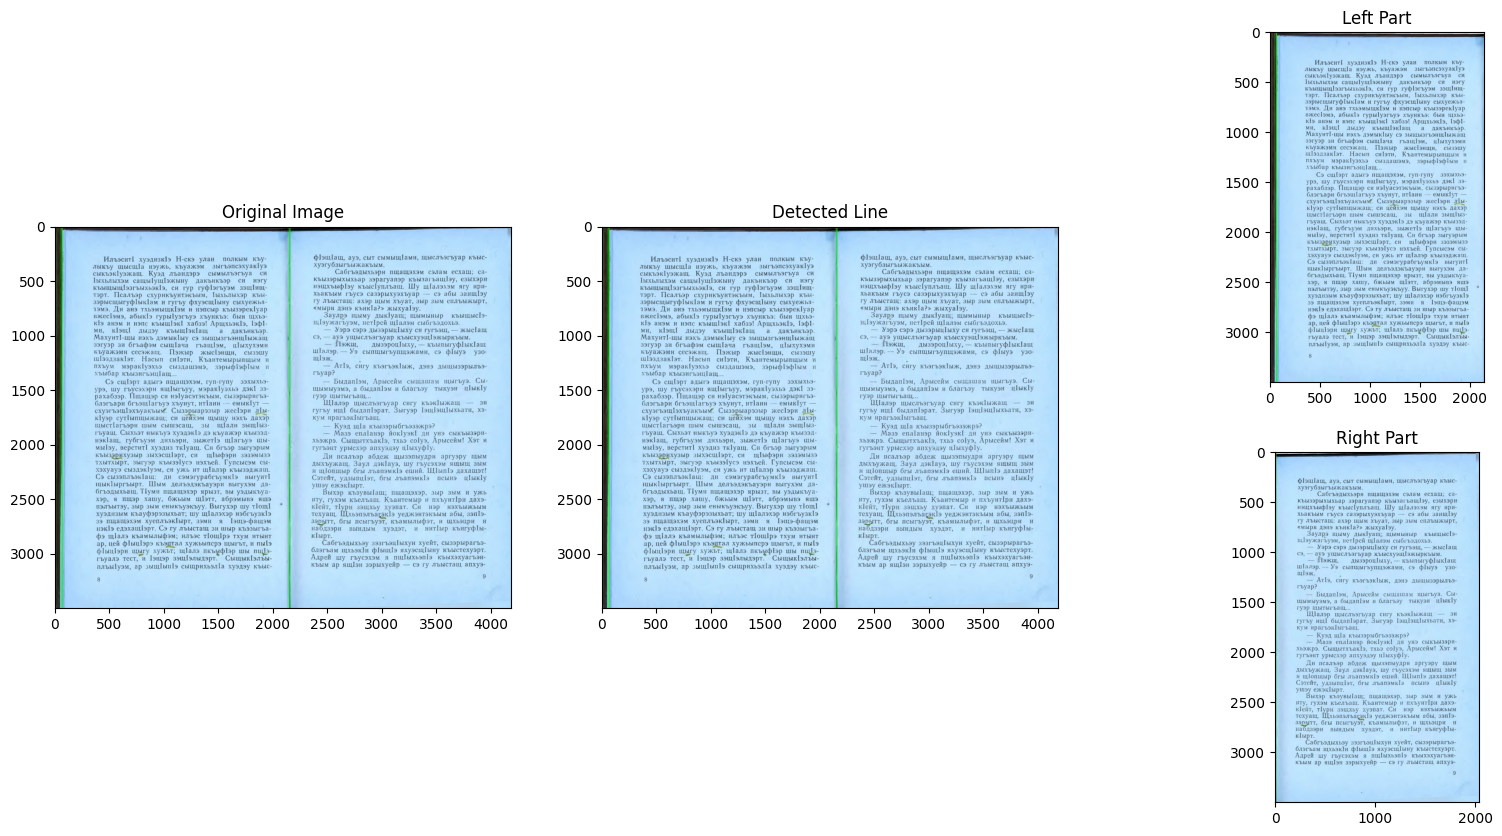

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_filepath = 'images/split_book_layout.jpg'

# Загрузка изображения
img = cv2.imread(img_filepath)

# Преобразование в оттенки серого и применение размытия
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (9, 9), 0)

# Применение алгоритма Кэнни для обнаружения границ
edges = cv2.Canny(blurred, 50, 150)

# Применение преобразования Хафа для обнаружения прямых линий
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Отбор вертикальных линий
vertical_lines = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
    if 80 < np.abs(angle) < 100:
        vertical_lines.append(line)

print(len(vertical_lines))

# Определение высоты изображения
height = img.shape[0]

# Отрисовка вертикальных линий от самого верха до самого низа страницы
for line in vertical_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, 0), (x2, height), (0, 255, 0), 2)

width = img.shape[1]

filtered_lines = []
for line in lines:
    x1, y1, x2, y2 = line[0]

    # Проверка, является ли линия вертикальной
    # Линия считается вертикальной, если координаты x начала и конца линии практически совпадают
    if abs(x1 - x2) < 10:
        # Проверка, что линия находится примерно посередине изображения
        if width / 3 < x1 < 2 * width / 3:
            filtered_lines.append(line)

# Выбор линии, ближайшей к центру
center_line = min(filtered_lines, key=lambda l: abs(l[0][0] - width / 2))

# Копирование изображения для отрисовки линий
img_copy = img.copy()
x1, y1, x2, y2 = center_line[0]
cv2.line(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Разделение изображения
left_img = img[:, :x1]
right_img = img[:, x1:]

# Отображение изображений с использованием matplotlib
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(img_copy, cmap='gray')
plt.title('Detected Line')

plt.subplot(2, 3, 3)
plt.imshow(left_img, cmap='gray')
plt.title('Left Part')

plt.subplot(2, 3, 6)
plt.imshow(right_img, cmap='gray')
plt.title('Right Part')


In [4]:
output_dir = 'images/output/spilt_book_layout'
os.makedirs(output_dir, exist_ok=True)

cv2.imwrite(os.path.join(output_dir, 'original.jpg'), img)
cv2.imwrite(os.path.join(output_dir, 'detected_line.jpg'), img_copy)
cv2.imwrite(os.path.join(output_dir, 'left_part.jpg'), left_img)
cv2.imwrite(os.path.join(output_dir, 'right_part.jpg'), right_img)

True